In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('final_table_modified.csv') #reading the data 

In [3]:
data=data.drop(['masked_acct'],axis=1) #deleting the masked_acct column as it consists of string values and cannot be converted to integer or float type
data.head()

,Vintage,ChargeOffMOB,BalanceAtDefault,FICOScore,FICOScorePctAvgFICOLast30DaysBookedLoans,NewUsedIndicator,VehicleManufacturerRebate,VehicleValueBlackBook,MoodysGDPReal,FinancedAmt,CashDownPmt,CashDownPmtPctBBVehicleValue,PaymentAmt,PaymentToFinancedAmtRatio,PTILine5,BackendTotalAmt,TotalDownPmt,rate_recovery
0,201708,15,9914.12,535.0,1.0203,0,0.0,6100.0,278.59,10397.4502,750.0,0.1230,282.20,0.0271,0.1091,2000.0,750.0,0.1856
1,201501,27,8484.37,534.0,0.9808,0,0.0,11225.0,819.33,11444.6602,2000.0,0.1782,278.61,0.0243,0.0529,0.0,4000.0,0.0000
2,201711,8,14905.78,495.0,0.9435,1,2000.0,10700.0,489.47,15157.8096,1200.0,0.1121,347.81,0.0229,0.1546,895.0,1200.0,0.5889
3,201709,15,13260.44,NaN,NaN,0,0.0,9925.0,322.10,13874.2998,1000.0,0.1008,336.55,0.0243,0.0854,2000.0,1000.0,0.3246
4,201507,10,20073.82,NaN,NaN,1,0.0,22850.0,232.89,20197.1309,14251.0,0.6237,426.90,0.0211,0.0502,0.0,14251.0,0.9667


In [4]:
data[['Vintage','ChargeOffMOB','BalanceAtDefault','FICOScore','FICOScorePctAvgFICOLast30DaysBookedLoans','NewUsedIndicator','VehicleManufacturerRebate','VehicleValueBlackBook','MoodysGDPReal','FinancedAmt','CashDownPmt','CashDownPmtPctBBVehicleValue','PaymentAmt','PaymentToFinancedAmtRatio','PTILine5','BackendTotalAmt','TotalDownPmt','rate_recovery']].isna().sum()
#Number of null values in each column

Vintage                                        0
ChargeOffMOB                                   0
BalanceAtDefault                               0
FICOScore                                   4214
FICOScorePctAvgFICOLast30DaysBookedLoans    4214
NewUsedIndicator                               0
VehicleManufacturerRebate                      0
VehicleValueBlackBook                         21
MoodysGDPReal                                  4
FinancedAmt                                    0
CashDownPmt                                    0
CashDownPmtPctBBVehicleValue                  21
PaymentAmt                                     0
PaymentToFinancedAmtRatio                      0
PTILine5                                       0
BackendTotalAmt                                0
TotalDownPmt                                   0
rate_recovery                                  0
dtype: int64

In [5]:
data=data.dropna(subset=['VehicleValueBlackBook','CashDownPmtPctBBVehicleValue','MoodysGDPReal']) #dropping the rows with null values in both the columns mentioned

In [6]:
data.head(20)

,Vintage,ChargeOffMOB,BalanceAtDefault,FICOScore,FICOScorePctAvgFICOLast30DaysBookedLoans,NewUsedIndicator,VehicleManufacturerRebate,VehicleValueBlackBook,MoodysGDPReal,FinancedAmt,CashDownPmt,CashDownPmtPctBBVehicleValue,PaymentAmt,PaymentToFinancedAmtRatio,PTILine5,BackendTotalAmt,TotalDownPmt,rate_recovery
0,201708,15,9914.12,535.0,1.0203,0,0.0,6100.0,278.59,10397.4502,750.0,0.1230,282.20,0.0271,0.1091,2000.0,750.0,0.1856
1,201501,27,8484.37,534.0,0.9808,0,0.0,11225.0,819.33,11444.6602,2000.0,0.1782,278.61,0.0243,0.0529,0.0,4000.0,0.0000
2,201711,8,14905.78,495.0,0.9435,1,2000.0,10700.0,489.47,15157.8096,1200.0,0.1121,347.81,0.0229,0.1546,895.0,1200.0,0.5889
3,201709,15,13260.44,NaN,NaN,0,0.0,9925.0,322.10,13874.2998,1000.0,0.1008,336.55,0.0243,0.0854,2000.0,1000.0,0.3246
4,201507,10,20073.82,NaN,NaN,1,0.0,22850.0,232.89,20197.1309,14251.0,0.6237,426.90,0.0211,0.0502,0.0,14251.0,0.9667
5,201604,28,21709.32,431.0,0.8304,0,0.0,18225.0,312.45,23230.8594,3500.0,0.1920,581.99,0.0251,0.1032,2459.0,3500.0,0.0524
6,201603,33,16817.36,508.0,0.9846,1,2500.0,13300.0,540.61,20338.4492,1500.0,0.1128,452.96,0.0223,0.1325,799.0,-2500.0,0.5726
7,201502,32,11060.06,NaN,NaN,0,0.0,10025.0,820.81,13919.1904,1300.0,0.1297,337.99,0.0243,0.1127,0.0,1300.0,0.0000
8,201504,6,17114.14,NaN,NaN,0,0.0,14425.0,827.77,17114.1406,2500.0,0.1733,421.01,0.0246,0.1619,0.0,2500.0,0.6882
9,201501,16,16474.85,555.0,1.0194,0,0.0,10775.0,237.76,16763.1602,1500.0,0.1392,448.96,0.0268,0.1030,2301.0,1500.0,0.4578


(array([2.400e+01, 2.960e+02, 1.582e+03, 2.693e+03, 2.700e+03, 1.518e+03,
        5.330e+02, 1.160e+02, 2.200e+01, 1.000e+00]),
 array([368. , 405.5, 443. , 480.5, 518. , 555.5, 593. , 630.5, 668. ,
        705.5, 743. ]),
 <BarContainer object of 10 artists>)

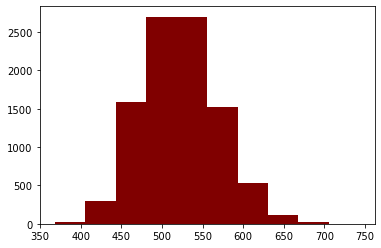

In [7]:
import matplotlib.pyplot as plt
x=data['FICOScore']

plt.hist( x, color ='maroon')# plotting the histogram on FICOScore column to check if it is normally distributed and impute the null values with the appropriate aggregate function


In [8]:
#imputing the FICOScore and FICOScorePctAvgFICOLast30DaysBookedLoans with the mean of the respective columns
data['FICOScore']=data['FICOScore'].fillna(data['FICOScore'].mean())
data['FICOScorePctAvgFICOLast30DaysBookedLoans']=data['FICOScorePctAvgFICOLast30DaysBookedLoans'].fillna(data['FICOScorePctAvgFICOLast30DaysBookedLoans'].mean())

In [9]:
data.head(20)

,Vintage,ChargeOffMOB,BalanceAtDefault,FICOScore,FICOScorePctAvgFICOLast30DaysBookedLoans,NewUsedIndicator,VehicleManufacturerRebate,VehicleValueBlackBook,MoodysGDPReal,FinancedAmt,CashDownPmt,CashDownPmtPctBBVehicleValue,PaymentAmt,PaymentToFinancedAmtRatio,PTILine5,BackendTotalAmt,TotalDownPmt,rate_recovery
0,201708,15,9914.12,535.00000,1.020300,0,0.0,6100.0,278.59,10397.4502,750.0,0.1230,282.20,0.0271,0.1091,2000.0,750.0,0.1856
1,201501,27,8484.37,534.00000,0.980800,0,0.0,11225.0,819.33,11444.6602,2000.0,0.1782,278.61,0.0243,0.0529,0.0,4000.0,0.0000
2,201711,8,14905.78,495.00000,0.943500,1,2000.0,10700.0,489.47,15157.8096,1200.0,0.1121,347.81,0.0229,0.1546,895.0,1200.0,0.5889
3,201709,15,13260.44,521.35224,0.985139,0,0.0,9925.0,322.10,13874.2998,1000.0,0.1008,336.55,0.0243,0.0854,2000.0,1000.0,0.3246
4,201507,10,20073.82,521.35224,0.985139,1,0.0,22850.0,232.89,20197.1309,14251.0,0.6237,426.90,0.0211,0.0502,0.0,14251.0,0.9667
5,201604,28,21709.32,431.00000,0.830400,0,0.0,18225.0,312.45,23230.8594,3500.0,0.1920,581.99,0.0251,0.1032,2459.0,3500.0,0.0524
6,201603,33,16817.36,508.00000,0.984600,1,2500.0,13300.0,540.61,20338.4492,1500.0,0.1128,452.96,0.0223,0.1325,799.0,-2500.0,0.5726
7,201502,32,11060.06,521.35224,0.985139,0,0.0,10025.0,820.81,13919.1904,1300.0,0.1297,337.99,0.0243,0.1127,0.0,1300.0,0.0000
8,201504,6,17114.14,521.35224,0.985139,0,0.0,14425.0,827.77,17114.1406,2500.0,0.1733,421.01,0.0246,0.1619,0.0,2500.0,0.6882
9,201501,16,16474.85,555.00000,1.019400,0,0.0,10775.0,237.76,16763.1602,1500.0,0.1392,448.96,0.0268,0.1030,2301.0,1500.0,0.4578


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
x=data[['Vintage','ChargeOffMOB','BalanceAtDefault','FICOScore','FICOScorePctAvgFICOLast30DaysBookedLoans','NewUsedIndicator','VehicleManufacturerRebate','VehicleValueBlackBook','MoodysGDPReal','FinancedAmt','CashDownPmt','CashDownPmtPctBBVehicleValue','PaymentAmt','PaymentToFinancedAmtRatio','PTILine5','BackendTotalAmt','TotalDownPmt']]
y=data[['rate_recovery']]
X_train, X_test, y_train, y_test=train_test_split(x,y , test_size = 0.3, random_state = 42 )
#splitting the test and train datasets from the original dataset

In [11]:
from sklearn.linear_model import LinearRegression
regmodel=LinearRegression()

In [18]:
regmodel.fit(X_train,y_train) #fitting a model on training dataset
y_train_pred = regmodel.predict(X_train)
y_train_pred

array([[0.49686211],
       [0.40111978],
       [0.55906631],
       ...,
       [0.51813546],
       [0.4354864 ],
       [0.41701585]])

In [16]:
y_test_pred=regmodel.predict(X_test) #predicting the test dataset with the model created from the training dataset
print('Recovery Rate: ', y_test_pred)

Recovery Rate:  [[0.50592894]
 [0.45196476]
 [0.59138784]
 ...
 [0.52043919]
 [0.3160172 ]
 [0.2666831 ]]


In [14]:
e = y_test - y_test_pred
MAE = np.mean(np.abs(e))
MAE #Used Mean absolute value to check the performance of the model created

rate_recovery    0.16168
dtype: float64

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
X=data[['Vintage','ChargeOffMOB','BalanceAtDefault','FICOScore','FICOScorePctAvgFICOLast30DaysBookedLoans','NewUsedIndicator','VehicleManufacturerRebate','VehicleValueBlackBook','MoodysGDPReal','FinancedAmt','CashDownPmt','CashDownPmtPctBBVehicleValue','PaymentAmt','PaymentToFinancedAmtRatio','PTILine5','BackendTotalAmt','TotalDownPmt']]
Y=data['rate_recovery']
kcv = KFold(n_splits=10, random_state=1, shuffle=True)
kfoldreg= LinearRegression()
scores = cross_validate(kfoldreg, X, Y, scoring='neg_mean_absolute_error', cv=kcv, n_jobs=-1,return_train_score=True)

scores
print("MAE for test datasets", np.mean(abs(scores['test_score'])))
print("MAE for train datasets",np.mean(abs(scores['train_score'])))

MAE for test datasets 0.16151523257606742
MAE for train datasets 0.16124126299928437


In [23]:
import pickle
file_name='Apollo_11.pkl'
f = open(file_name,'wb')
pickle.dump(y_train_pred,f)
f.close()